### 1. Sử dụng dữ liệu bán hàng 'sale_data_vn.csv':
    1.1 Vẽ biểu đồ cột, pie về tần số, tuần suất đơn hàng theo
        − Địa phương (HN, SG, ĐN)
        − Giới tính
    1.2 Vẽ biểu đồ histogram về phân bố giá trị đơn hàng, rating
        − Phân bố chung
        − Theo giới tính, theo địa phương
    1.3 Vẽ biểu đồ scatter về mối liên hệ giữa giá trị đơn hàng và rating
    1.4 Vẽ biểu đồ tree-map cho các mặt hàng ('Product line')

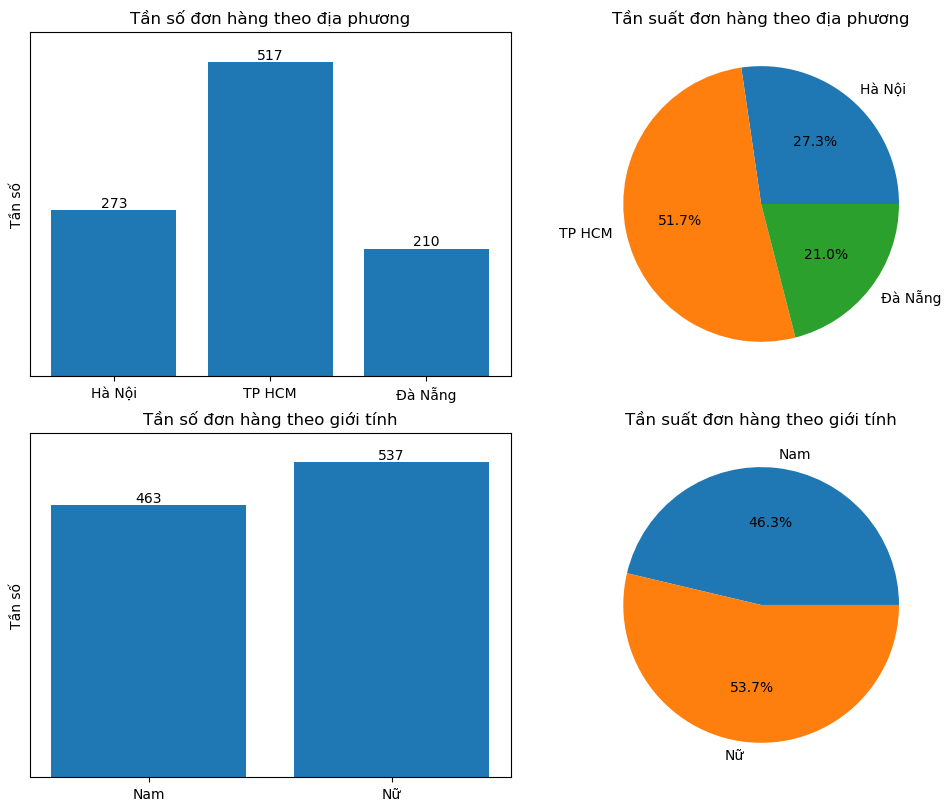

In [9]:
import csv
import matplotlib.pyplot as plt

with open('sale_data_vn.csv', 'r', encoding="utf-8") as file:
    ds_data = csv.reader(file)
    next(ds_data, None)
    ds_city = []
    ds_gt = []
    ds_tong = []
    ds_rating = []
    ds_pl = []
    for row in ds_data:
        ds_city.append(row[2])
        ds_gt.append(row[4])
        ds_tong.append(float(row[10]))
        ds_rating.append(int(row[-1]))
        ds_pl.append(row[5])
        
#  1.1 Vẽ biểu đồ cột, pie về tần số, tuần suất đơn hàng theo
#     − Địa phương (HN, SG, ĐN)
#     − Giới tính

# Địa phương
# Dữ liệu tần số và tần suất địa phương:
count_HN = ds_city.count('Hà Nội')
count_HCM = ds_city.count('TP HCM')
count_ĐN = ds_city.count('Đà Nẵng')

pct_HN = count_HN * 100 / len(ds_city)
pct_HCM = count_HCM * 100 / len(ds_city)
pct_ĐN = count_ĐN * 100 / len(ds_city)

labels = ['Hà Nội', 'TP HCM', 'Đà Nẵng']
counts = [count_HN, count_HCM, count_ĐN]
percentages = [pct_HN, pct_HCM, pct_ĐN]

# Giới tính
# Dữ liệu tần số và tần suất:
count_nam = ds_gt.count("Nam")
count_nữ = ds_gt.count("Nữ")

pct_nam = 100 * count_nam / len(ds_gt)
pct_nữ = 100 * count_nữ / len(ds_gt)

# Tạo hình vẽ và các đồ thị con
fig, axes = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)

# Biểu đồ cột địa phương
bars = axes[0, 0].bar(labels, counts)
axes[0, 0].set_yticks([])
axes[0, 0].set_ylim([0, max(counts) + 50])
axes[0, 0].set_ylabel('Tần số')
axes[0, 0].set_title('Tần số đơn hàng theo địa phương')

# Thêm giá trị lên các cột địa phương
for bar in bars:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width() / 2, height, height,
                    ha='center', va='bottom')

# Biểu đồ tròn địa phương
axes[0, 1].pie(percentages, labels=labels, autopct='%1.1f%%')
axes[0, 1].set_title('Tần suất đơn hàng theo địa phương')

# Biểu đồ cột giới tính
gender_labels = ['Nam', 'Nữ']
gender_counts = [count_nam, count_nữ]
bars = axes[1, 0].bar(gender_labels, gender_counts)
axes[1, 0].set_yticks([])
axes[1, 0].set_ylim([0, max(gender_counts) + 50])
axes[1, 0].set_ylabel('Tần số')
axes[1, 0].set_title('Tần số đơn hàng theo giới tính')

# Thêm giá trị lên các cột giới tính
for bar in bars:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width() / 2, height, height,
                    ha='center', va='bottom')

# Biểu đồ tròn giới tính
gender_percentages = [pct_nam, pct_nữ]
axes[1, 1].pie(gender_percentages, labels=gender_labels, autopct='%1.1f%%')
axes[1, 1].set_title('Tần suất đơn hàng theo giới tính')

# Hiển thị hình vẽ
plt.show()

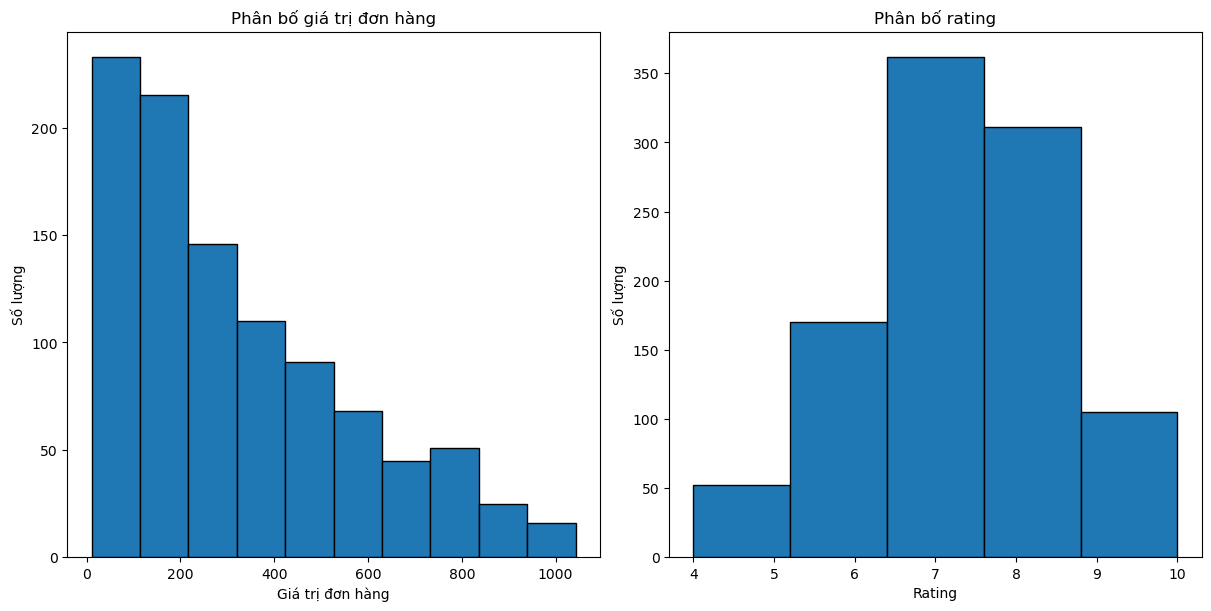

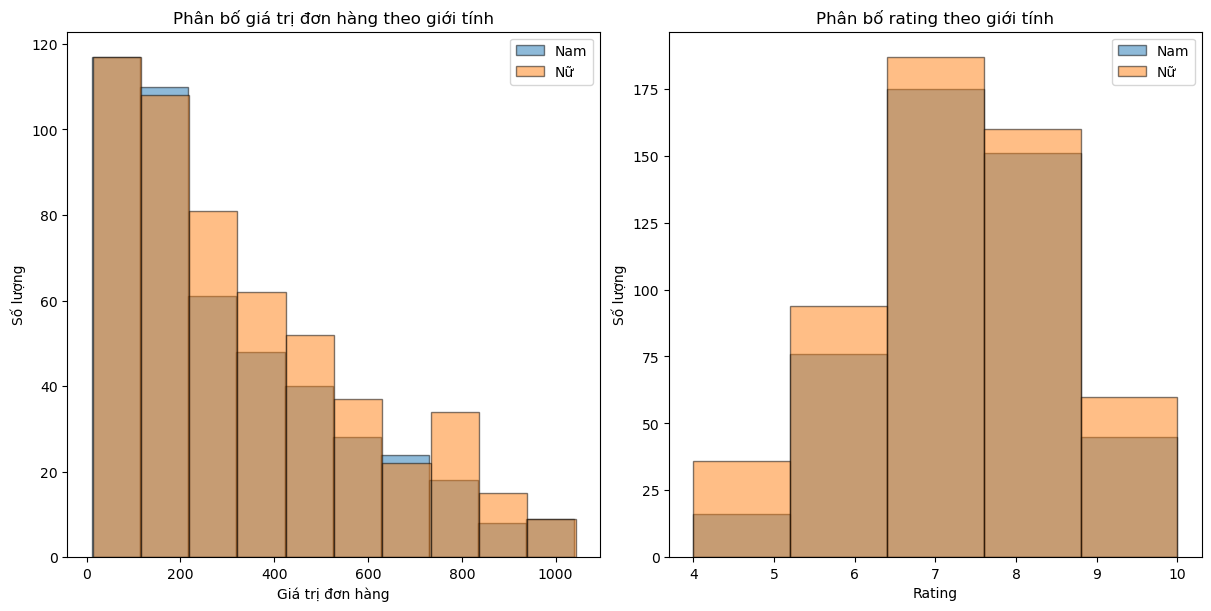

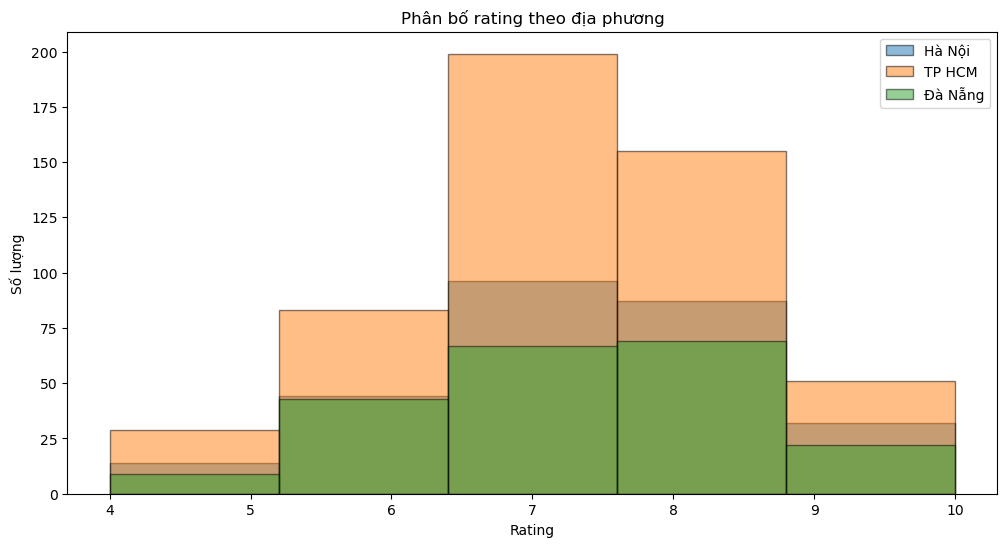

In [10]:
# 1.2 Vẽ biểu đồ histogram về phân bố giá trị đơn hàng, rating
#     − Phân bố chung
#     − Theo giới tính, theo địa phương

# Phân bố chung
# Giá trị đơn hàng
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

axes[0].hist(ds_tong, bins=10, edgecolor='black')
axes[0].set_xlabel('Giá trị đơn hàng')
axes[0].set_ylabel('Số lượng')
axes[0].set_title('Phân bố giá trị đơn hàng')

# Rating
axes[1].hist(ds_rating, bins=5, edgecolor='black')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Số lượng')
axes[1].set_title('Phân bố rating')

plt.show()

# Theo giới tính
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Giá trị đơn hàng theo giới tính
axes[0].hist([ds_tong[i] for i in range(len(ds_gt)) if ds_gt[i] == 'Nam'], bins=10, alpha=0.5, label='Nam', edgecolor='black')
axes[0].hist([ds_tong[i] for i in range(len(ds_gt)) if ds_gt[i] == 'Nữ'], bins=10, alpha=0.5, label='Nữ', edgecolor='black')
axes[0].set_xlabel('Giá trị đơn hàng')
axes[0].set_ylabel('Số lượng')
axes[0].set_title('Phân bố giá trị đơn hàng theo giới tính')
axes[0].legend()

# Rating theo giới tính
axes[1].hist([ds_rating[i] for i in range(len(ds_gt)) if ds_gt[i] == 'Nam'], bins=5, alpha=0.5, label='Nam', edgecolor='black')
axes[1].hist([ds_rating[i] for i in range(len(ds_gt)) if ds_gt[i] == 'Nữ'], bins=5, alpha=0.5, label='Nữ', edgecolor='black')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Số lượng')
axes[1].set_title('Phân bố rating theo giới tính')
axes[1].legend()

plt.show()

# Theo địa phương
fig, ax = plt.subplots(figsize=(12, 6))

# Tạo danh sách các địa phương
dia_phuong = ['Hà Nội', 'TP HCM', 'Đà Nẵng']

# Vẽ histogram cho mỗi địa phương
for dp in dia_phuong:
    data_dp = [ds_rating[i] for i in range(len(ds_city)) if ds_city[i] == dp]
    ax.hist(data_dp, bins=5, alpha=0.5, label=dp, edgecolor='black')

# Thiết lập các thông số cho biểu đồ
ax.set_xlabel('Rating')
ax.set_ylabel('Số lượng')
ax.set_title('Phân bố rating theo địa phương')
ax.legend()

# Hiển thị biểu đồ
plt.show()

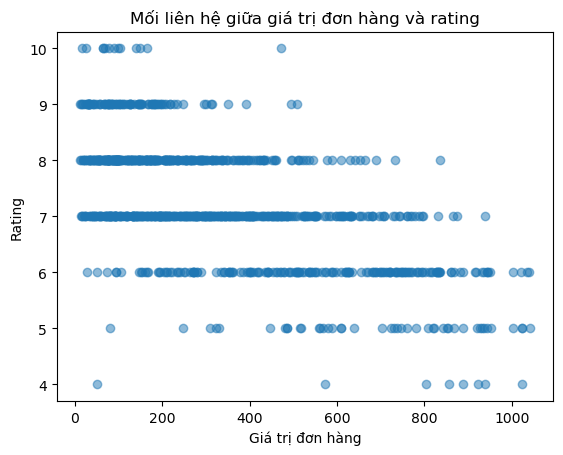

In [11]:
# 1.3 Vẽ biểu đồ scatter về mối liên hệ giữa giá trị đơn hàng và rating

# Tạo biểu đồ scatter
plt.scatter(ds_tong, ds_rating, alpha=0.5)

# Thiết lập các thông số cho biểu đồ
plt.xlabel('Giá trị đơn hàng')
plt.ylabel('Rating')
plt.title('Mối liên hệ giữa giá trị đơn hàng và rating')

# Hiển thị biểu đồ
plt.show()

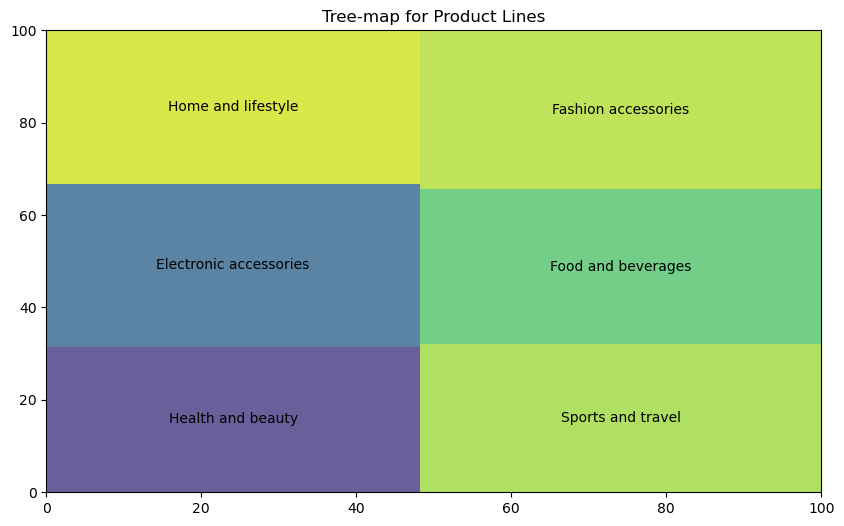

In [15]:
# 1.4 Vẽ biểu đồ tree-map cho các mặt hàng ('Product line')
import squarify

# Tính toán kích thước của các hình chữ nhật trong treemap dựa trên tỷ lệ phần trăm
freq_dict = {}
for pl in ds_pl:
    freq_dict[pl] = freq_dict.get(pl, 0) + 1

# Tạo danh sách kích thước và nhãn từ từ điển tần số
sizes = list(freq_dict.values())
labels = list(freq_dict.keys())

# Vẽ biểu đồ tree-map
plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)

# Thiết lập các tham số cho biểu đồ

plt.title('Tree-map for Product Lines')

# Hiển thị biểu đồ
plt.show()